In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

def draw_plot():
    # Read data from file
    df = pd.read_csv('epa-sea-level.csv')   

    # Renamed Sea Level Column to be more typable
    df = df.rename(columns={'CSIRO Adjusted Sea Level' : 'Sea Level'})
    
    #print(df.tail(3))   # Last three rows

    
    # Create scatter plot
    fig, ax = plt.subplots()
    ax.scatter(df['Year'], df['Sea Level'], color='blue', s=2)
    
    
    # Create first line of best fit
    res1 = linregress(df['Year'], df['Sea Level'])
    print('Slope = ', res1.slope)
    print('Intercept = ', res1.intercept)
    x1_2050 = np.linspace(min(df['Year']), 2050, 200)
    y1_2050 = res1.slope*x1_2050 + res1.intercept
    
    ax.plot(x1_2050, y1_2050, color='red', label='L1')


    # Create second line of best fit
    df_2 = df[df['Year'] > 1999]
    res2 = linregress(df_2['Year'], df_2['Sea Level'])
    print('Slope 2 = ', res2.slope)
    print('Intercept 2 = ', res2.intercept)
    x2_2050 = np.linspace(min(df_2['Year']), 2050, 200)
    y2_2050 = res2.slope*x2_2050 + res2.intercept
    
    ax.plot(x2_2050, y2_2050, color='green', label='L2')


    # Add labels and title
    ax.set_xlabel('Year')
    ax.set_ylabel('Sea Level (inches)')
    ax.set_title('Rise in Sea Level')
    ax.legend()
    
    # Save plot and return data for testing (DO NOT MODIFY)
    plt.savefig('sea_level_plot.png')
    return plt.gca()

     Year  Sea Level  Lower Error Bound  Upper Error Bound  \
131  2011   8.964567           8.661417           9.267717   
132  2012   9.326772           8.992126           9.661417   
133  2013   8.980315           8.622047           9.338583   

     NOAA Adjusted Sea Level  
131                 8.053065  
132                 8.457058  
133                 8.546648  
Slope =  0.0630445840121348
Intercept =  -119.06594196773978
Slope 2 =  0.1664272733318682
Intercept 2 =  -325.7934668059649


<Axes: title={'center': 'Rise in Sea Level'}, xlabel='Year', ylabel='Sea Level (inches)'>

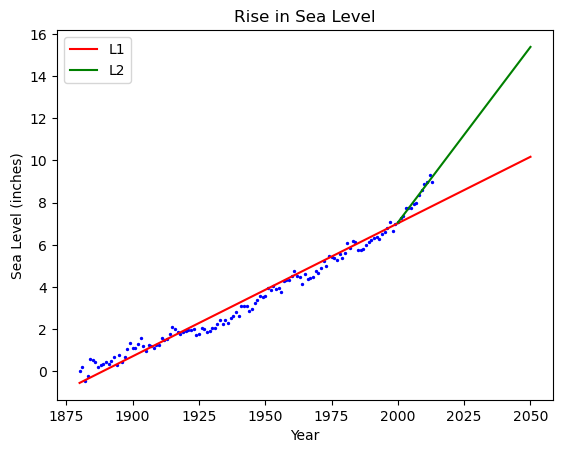

In [72]:
draw_plot()